In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
data["label"].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

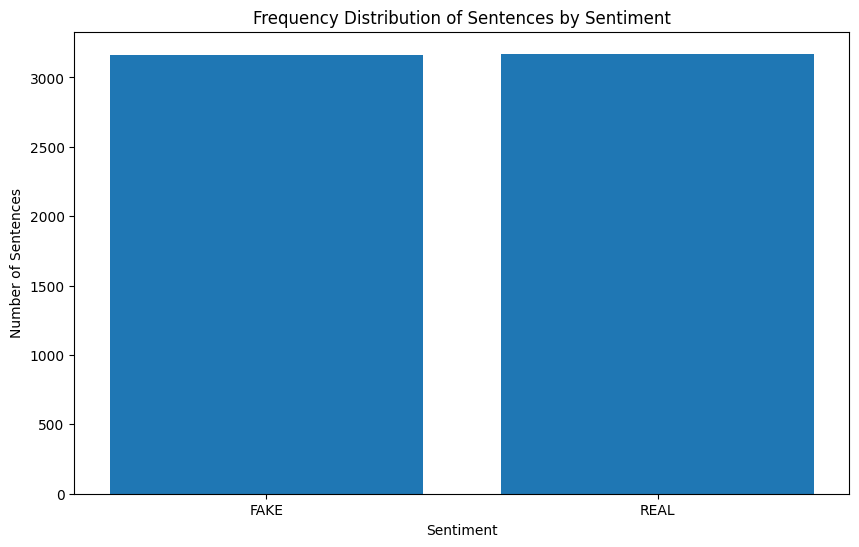

In [4]:
sentiment_counts = data.groupby('label')['text'].count()

plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentences')
plt.title('Frequency Distribution of Sentences by Sentiment')
plt.show()

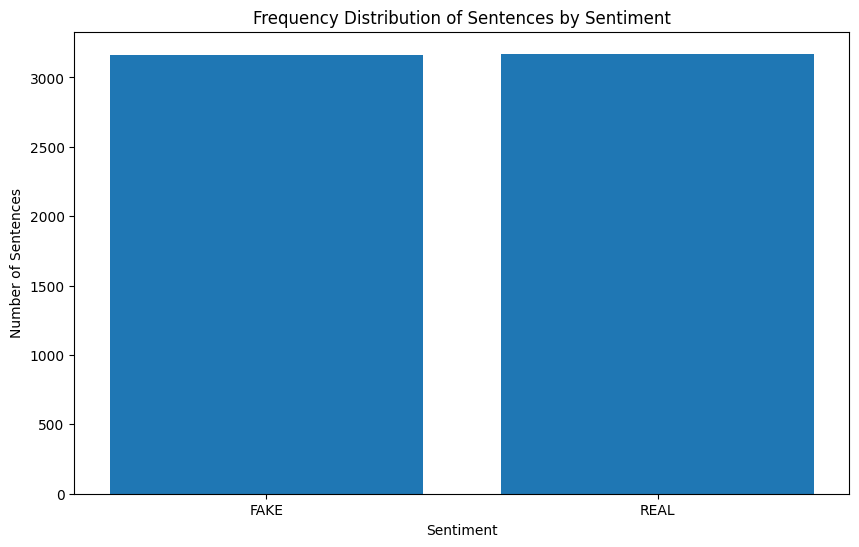

In [5]:
sentiment_counts = data.groupby('label')['text'].count()

plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentences')
plt.title('Frequency Distribution of Sentences by Sentiment')
plt.show()

In [6]:
label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


98817


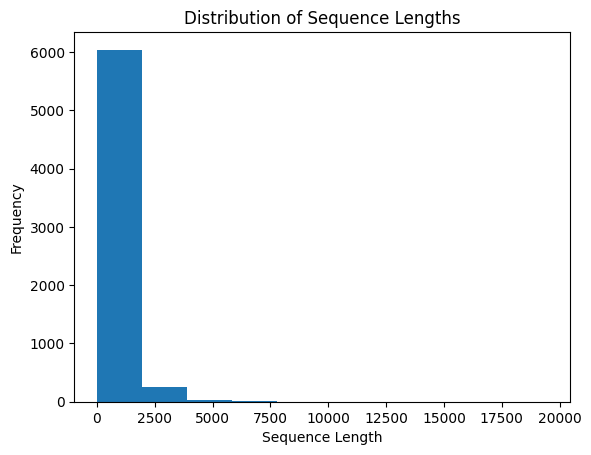

In [7]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
word_index = tokenizer.word_index

print(len(word_index))
sequence_lengths = [len(seq) for seq in sequences]

plt.hist(sequence_lengths)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

In [8]:
print(max(sequence_lengths))

19494


In [9]:
padded_sequences = pad_sequences(sequences, maxlen=1500, padding='post', truncating='post')

X_train, X_temp, y_train, y_temp = train_test_split(
    padded_sequences, data['label'], test_size=0.2, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout, Conv1D

model = Sequential([
    Embedding(input_dim=len(word_index)+1, output_dim=32),
    Conv1D(64, 5, padding='valid',strides=3, activation='relu'),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
EPOCHS = 10
BATCH_SIZE = 64

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 233ms/step - accuracy: 0.6180 - loss: 0.6479 - val_accuracy: 0.8375 - val_loss: 0.4512
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 230ms/step - accuracy: 0.9079 - loss: 0.2618 - val_accuracy: 0.9401 - val_loss: 0.1378
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 227ms/step - accuracy: 0.9711 - loss: 0.0969 - val_accuracy: 0.9543 - val_loss: 0.1296
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 0.9953 - loss: 0.0233 - val_accuracy: 0.9448 - val_loss: 0.1919
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 231ms/step - accuracy: 0.9970 - loss: 0.0130 - val_accuracy: 0.9495 - val_loss: 0.1988
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 235ms/step - accuracy: 0.9995 - loss: 0.0051 - val_accuracy: 0.9558 - val_loss: 0.2068


In [43]:
loss, accuracy = model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9568 - loss: 0.1440


In [44]:
print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 1500, 32)       │     3,162,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 499, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 499, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 31936)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     4,087,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,781,637 (83.09 MB)

 Trainable params: 7,260,545 (27.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,521,092 (55.39 MB)

None


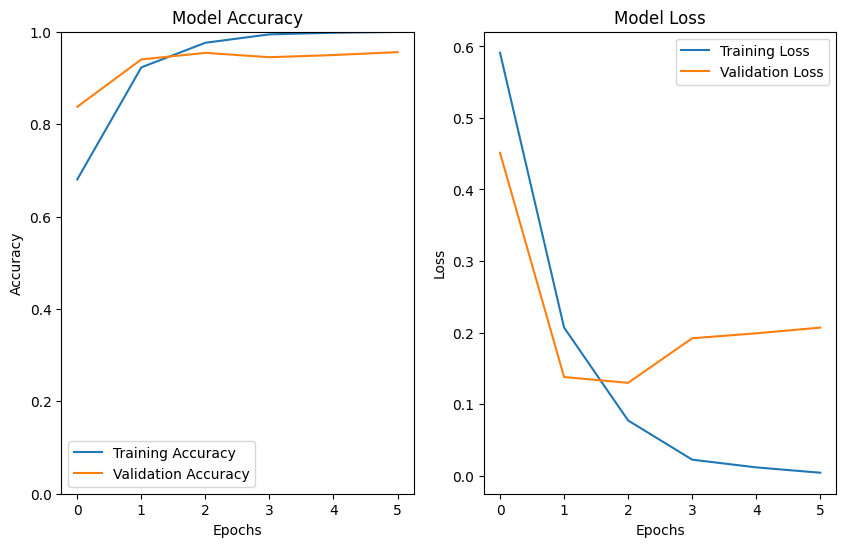

In [45]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.ylim((0,1))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [46]:
labels = {
    0: 'FAKE',
    1: 'REAL',
}

y_pred = model.predict(X_test)
y_pred_classes =  [1 if p >= 0.5 else 0 for p in y_pred]


for i in range(10):
    print(f"Example {i+1}: Actual Label - {labels[y_test.iloc[i]]}, Predicted Label - {labels[y_pred_classes[i]]} {labels[y_pred_classes[i]] == labels[y_test.iloc[i]]}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Example 1: Actual Label - FAKE, Predicted Label - FAKE True
Example 2: Actual Label - FAKE, Predicted Label - FAKE True
Example 3: Actual Label - REAL, Predicted Label - REAL True
Example 4: Actual Label - REAL, Predicted Label - REAL True
Example 5: Actual Label - REAL, Predicted Label - REAL True
Example 6: Actual Label - REAL, Predicted Label - REAL True
Example 7: Actual Label - REAL, Predicted Label - REAL True
Example 8: Actual Label - REAL, Predicted Label - REAL True
Example 9: Actual Label - FAKE, Predicted Label - FAKE True
Example 10: Actual Label - REAL, Predicted Label - REAL True


In [47]:
model.save('model.keras')